# Traveling Salesman Problem
#### Solution by Anthony Broderick

**Link for this Jupyter Notebook on Colab**: https://colab.research.google.com/drive/1XNpe11_qRpKWRpzBV0J1e5M-7kIvTZqR?usp=sharing

## Project Description:

This notebook will explore a variant of the traveling salesman problem and analyze the time complexity and implementation of different logical approaches to those solutions (such as brute force, divide and conquer, etc.).

The problem to be analyzed is as follows:

"In the Sun Interplanetary Republic, communication between spaceships is crucial. Each
spaceship is positioned at a unique point in a 3D coordinate system (x,y,z), with the Sun
located at the origin (0,0,0). Each increment in x, y, or z represents 10 million miles. The
alpha spaceship serves as the central hub for signal transmissions. 

Every spaceship receiving the signal must amplify it before passing it to the next
spaceship; otherwise, the signal will be lost in outer space. To ensure efficient
communication, a signal must originate from the alpha spaceship, visit every other
spaceship exactly once and return to the alpha spaceship.

The distance between two spaceships located at (x1, y1, z1) and (x2, y2, z2) is calculated
using the Euclidean distance formula. Your task is to find the shortest route for the signal
that starts from the alpha spaceship, visits each of the remaining n−1 spaceships exactly
once, and returns to the alpha spaceship. You also need to print the total distance of the
shortest route."

# Part I: Brute Force Solution

## Solution Description

The problem is an example of the Traveling Salesman Problem (TSP). This code uses a brute-force approach to find the shortest route that visits all spaceships and returns to the starting point. The algorithm begins by generating all possible routes, represented as permutations of the spaceships excluding the alpha spaceship, which serves as the starting and ending point. Using `itertools.permutations`, we enumerate these routes without explicitly storing them, ensuring the memory usage remains manageable for smaller inputs.

For each generated route, the algorithm calculates the total distance traveled. This involves iterating through the route and computing the Euclidean distance between consecutive spaceships, which is derived using the standard formula for three-dimensional points. The distance back to the alpha spaceship is also included in the total to ensure the route is complete. The distance calculation is repeated for all possible routes, and the algorithm tracks the route with the shortest distance encountered so far.

The comparison phase ensures that the shortest route and its corresponding total distance are updated as necessary during the iteration over all routes. By the end, the algorithm identifies the optimal route and its total distance.

## Psuedocode:

In [ ]:
"""
FUNCTION euclidean_distance(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    RETURN sqrt((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2)

FUNCTION total_distance(route, spaceship_coordinates):
    total_dist = 0
    current_point = 0  // Start from alpha spaceship (index 0)
    FOR each next_point IN route:
        total_dist += euclidean_distance(spaceship_coordinates[current_point], spaceship_coordinates[next_point])
        current_point = next_point
    total_dist += euclidean_distance(spaceship_coordinates[current_point], spaceship_coordinates[0])  // Return to alpha spaceship
    RETURN total_dist

FUNCTION brute_force_tsp(spaceship_coordinates):
    n = length of spaceship_coordinates  // Number of spaceships (including the alpha spaceship)
    
    routes = generate all permutations of indices from 1 to n-1  // Generate all possible routes excluding alpha spaceship (index 0)
    
    min_distance = infinity  // Initialize minimum distance to a large number
    best_route = None
    
    FOR each route IN routes:
        dist = total_distance(route, spaceship_coordinates)  // Calculate total distance for this route
        
        IF dist < min_distance:
            min_distance = dist
            best_route = route
    
    RETURN best_route, min_distance  // Return shortest route and its total distance
"""

## Python Implementation

In [ ]:
import itertools
import math

# Calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Calculate total distance for a given route of spaceships
def total_distance(route, spaceship_coordinates):
    total_dist = 0
    # Start from alpha spaceship (index 0)
    current_point = 0
    for next_point in route:
        total_dist += euclidean_distance(spaceship_coordinates[current_point], spaceship_coordinates[next_point])
        current_point = next_point
    # Return to alpha spaceship
    total_dist += euclidean_distance(spaceship_coordinates[current_point], spaceship_coordinates[0])
    return total_dist

# Brute force solution to find the shortest route
def brute_force_tsp(spaceship_coordinates):
    n = len(spaceship_coordinates)  # Number of spaceships (including the alpha spaceship)

    # Generate all possible routes excluding the alpha spaceship (index 0)
    routes = itertools.permutations(range(1, n))

    # Initialize minimum distance to a large number
    min_distance = float('inf')
    best_route = None

    # Check all permutations
    for route in routes:
        # Calculate the total distance for this route
        dist = total_distance(route, spaceship_coordinates)

        # Update the minimum distance and best route if this one is shorter
        if dist < min_distance:
            min_distance = dist
            best_route = route

    # Convert the route indices to their coordinates (including alpha spaceship at the start)
    best_route_with_coordinates = [spaceship_coordinates[0]]  # Start with alpha spaceship
    for index in best_route:
        best_route_with_coordinates.append(spaceship_coordinates[index])

    # Return the coordinates of the best route and its total distance
    return best_route_with_coordinates, min_distance



### Performance Testing

In [ ]:
import random
# Number of spaceships including the alpha spaceship
n = 11 # max the program can run < 5 min

# 11 values so program runs under 5 min
spaceship_coordinates = [
(10, 10, 10),
(-168, -64, -141),
(-200, 90, -81),
(13, -118, 131),
(109, -279, -133),
(-143, -142, 15),
(202, 231, -140),
(22, -24, -30),
(-60, -219, -48),
(-95, -289, -280),
(100, 150, -120),
(-250, 200, 80)
]

# spaceship_coordinates_full_list = [
(10, 10, 10),
(-168, -64, -141),
(-200, 90, -81),
(13, -118, 131),
(109, -279, -133),
(-143, -142, 15),
(202, 231, -140),
(22, -24, -30),
(-60, -219, -48),
(-95, -289, -280),
(100, 150, -120),
(-250, 200, 80),
(-190, -80, 210),
(85, -180, -50),
(260, 60, -100),
(-230, -70, 170),
(180, -150, 90),
(-110, 240, -130),
(50, -220, 200),
(140, 130, -200),
(-280, 160, 110),
(70, -190, -210),
(210, 20, 50),
(-300, -90, 190),
(160, 100, -70),
(-20, 250, -160),
(190, -140, -30),
(-60, -230, 220),
(130, 180, -190),
(-170, 80, 140),
(240, -110, 60),
(-130, -200, -90),
(80, 220, -150),
(-210, 50, -120),
(110, -160, 170),
(-80, -240, 100),
(230, 70, -180),
(-150, 210, 40),
(90, -130, -220),
(-260, -100, 130),
(200, 30, -60),
(-100, 170, -140),
(60, -210, 190),
(170, 120, -110),
(-220, 90, 80),
(30, -180, -240),
(160, 200, -50),
(-90, -150, 230),
(210, -70, -130),
(-140, 110, 60),
(100, -190, 150),
(-70, -220, -80),
(250, 40, -170),
(-200, 140, 90),
(120, -160, -20),
(-40, 230, -190),
(180, 80, -100),
(-160, -130, 210),
(50, 190, -70),
(-250, 60, 120),
(140, -200, 40),
(-110, -240, -150),
(220, 100, -90),
(-80, 170, 200),
(190, -140, -60),
(-60, -210, 160),
(160, 50, -220),
(-190, 120, 70),
(80, -180, 130),
(-230, -100, -110),
(110, 160, -200),
(-50, 210, -80),
(200, -70, 90),
(-120, -190, 140),
(70, 130, -170),
(-170, 220, 30),
(150, -160, -40),
(-90, -230, 180),
(240, 90, -120),
(-60, 180, -150),
(180, -110, 70),
(-140, -200, -90),
(90, 150, -210),
(-220, 60, 100),
(130, -190, 50),
(-100, -170, -80),
(210, 80, -130),
(-70, 240, -60),
(160, -140, 200),
(-190, 100, -100),
(100, -210, 120),
(-50, -190, 160),
(190, 120, -90),
(-130, 150, 70),
(80, -220, -140),
(-240, -80, 110),
(140, 200, -50),
(-110, 170, -180),
(220, -130, 60),
(-80, -210, 140),
(170, 90, -160),
(-150, 230, 80)
# ]

# Set the coordinate range, spaceship coordinates to make them roughly in the solar system
coord_range = (-300, 300)

# Generate more unique spaceship coordinates
alpha_ship = spaceship_coordinates[0]
coordinates_set = set()
coordinates_set.add(alpha_ship) # Ensure alpha ship coordinate is included in the set to prevent duplicates

while len(spaceship_coordinates) < n:
    x = random.randint(coord_range[0], coord_range[1])
    y = random.randint(coord_range[0], coord_range[1])
    z = random.randint(coord_range[0], coord_range[1])
    coord = (x, y, z)
    if coord not in coordinates_set:
        coordinates_set.add(coord)
        spaceship_coordinates.append(coord)
# Now spaceship_coordinates contains n number of unique spaceship coordinates

# Find the shortest route
best_route, min_distance = brute_force_tsp(spaceship_coordinates)

# Output the result
print(f"The best route is: {best_route}")
print(f"The total distance of the shortest route is: {min_distance}")




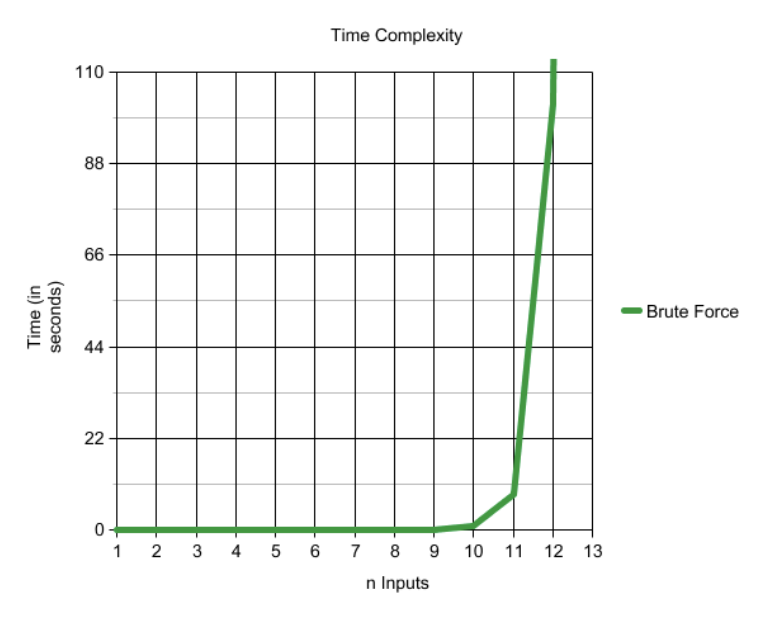

## Complexity Analysis: 

The algorithm begins by generating all possible routes, excluding the alpha spaceship. This computes permutations of the remaining (n-1) spaceships, which takes O((n-1)!) time.

For each route, the total distance is calculated by summing the Euclidean distances between consecutive spaceships, including the return to the alpha spaceship. Since there are n distances per route and (n-1)! routes, this step requires O(n*(n-1)!) time.

To determine the shortest route, the algorithm iterates through all (n-1)! routes, comparing their total distances, adding another O((n-1)!) to the complexity. Combining these components, the overall time complexity is dominated by the distance evaluation step, resulting in   O(n*(n-1)!).

The space complexity is O(n) because of the input list of spaceship coordinates.

# Part II: Dynamic Programming (Optimal Solution)

## Solution Description:

For solving the Traveling Salesman Problem (TSP) optimally uses dynamic programming, we will utilize the Held-Karp algorithm.

First, we define a state dp[mask][i], where mask is a bitmask indicating the set of visited nodes, and i is the current node. The algorithm computes the minimum cost to reach node i having visited all nodes indicated in mask.

Transitions are governed by the formula dp[mask][i] = min(dp[mask \ (1 < i)][j] + distance(j, i)), iterating over all unvisited nodes j.

We begin with the starting node and iterate over subsets of nodes in increasing size, concluding with a return to the start. The approach ensures we obtain the optimal solution.

## Psuedocode:

In [ ]:
"""
FUNCTION euclidean_distance(p1, p2):
    RETURN sqrt((p1[0] - p2[0])^2 + (p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)

FUNCTION dynamic_programming_tsp(spaceships):
    n = length of spaceships  # Number of spaceships
    # Calculate distance matrix between each pair of spaceships
    dist = create 2D array of size n x n, initialized with 0
    FOR i from 0 to n - 1:
        FOR j from i + 1 to n - 1:
            distance = euclidean_distance(spaceships[i], spaceships[j])
            dist[i][j] = dist[j][i] = distance

    # Initialize dynamic programming table
    INF = infinity
    dp = create 2D array of size (2^n) x n, initialized with INF
    parent = create 2D array of size (2^n) x n, initialized with -1
    dp[1][0] = 0  # Starting from the alpha spaceship (node 0)

    # Iterate over all subsets of spaceships
    FOR mask from 1 to (2^n) - 1:
        FOR u from 0 to n - 1:
            IF (mask & (1 << u)) == 0:  # If u is not in the subset
                CONTINUE
            # Try to extend the path by visiting a new spaceship v
            FOR v from 0 to n - 1:
                IF (mask & (1 << v)):  # If v is already in the subset
                    CONTINUE
                new_mask = mask | (1 << v)
                IF dp[new_mask][v] > dp[mask][u] + dist[u][v]:
                    dp[new_mask][v] = dp[mask][u] + dist[u][v]
                    parent[new_mask][v] = u

    # Reconstruct the minimum path by visiting all spaceships and returning to the alpha spaceship
    min_cost = INF
    last_node = -1
    FOR i from 1 to n - 1:
        IF min_cost > dp[(2^n) - 1][i] + dist[i][0]:
            min_cost = dp[(2^n) - 1][i] + dist[i][0]
            last_node = i

    # Reconstruct the best path
    best_route = empty array
    mask = (2^n) - 1
    WHILE last_node != -1:
        APPEND last_node to best_route
        next_node = parent[mask][last_node]
        mask = mask XOR (1 << last_node)
        last_node = next_node

    REVERSE best_route  # Reverse the route to start from 0

    # Convert the best route to coordinates
    best_route_coordinates = empty array
    FOR each index i in best_route:
        APPEND spaceships[i] to best_route_coordinates

    RETURN best_route_coordinates, min_cost
"""

## Python Implementation:

In [ ]:
import math
import random

# Function to calculate Euclidean distance between two spaceships
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2)

# Function to solve the Traveling Salesman Problem using Dynamic Programming (Held-Karp)
def dynamic_programming_tsp(spaceships):
    n = len(spaceships)
    # Calculate distance matrix between each pair of spaceships
    dist = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            distance = euclidean_distance(spaceships[i], spaceships[j])
            dist[i][j] = dist[j][i] = distance

    # dp[mask][i] will be the minimum cost to visit all nodes in mask, ending at node i
    INF = float('inf')
    dp = [[INF] * n for _ in range(1 << n)]
    parent = [[-1] * n for _ in range(1 << n)]  # To store the path
    dp[1][0] = 0  # Starting from the alpha spaceship (node 0)

    # Iterate over all subsets of spaceships
    for mask in range(1, 1 << n):
        for u in range(n):
            if (mask & (1 << u)) == 0:
                continue
            # Try to extend the path by visiting a new spaceship v
            for v in range(n):
                if mask & (1 << v):
                    continue
                new_mask = mask | (1 << v)
                if dp[new_mask][v] > dp[mask][u] + dist[u][v]:
                    dp[new_mask][v] = dp[mask][u] + dist[u][v]
                    parent[new_mask][v] = u

    # Reconstruct the minimum path by visiting all spaceships and returning to the alpha spaceship
    min_cost = INF
    last_node = -1
    for i in range(1, n):
        if min_cost > dp[(1 << n) - 1][i] + dist[i][0]:
            min_cost = dp[(1 << n) - 1][i] + dist[i][0]
            last_node = i

    # Reconstruct the best path
    best_route = []
    mask = (1 << n) - 1
    while last_node != -1:
        best_route.append(last_node)
        next_node = parent[mask][last_node]
        mask ^= (1 << last_node)
        last_node = next_node

    # No need to append 0 here, as we will ensure the starting point is handled correctly
    best_route.reverse()  # Reverse the route to start from 0

    # Convert the best route to coordinates
    best_route_coordinates = [spaceships[i] for i in best_route]

    return best_route_coordinates, min_cost


### Performance Testing: 

In [ ]:
import random
# Number of spaceships including the alpha spaceship
n = 23 # max the program can run < 5 min

# 23 values so program executes under 5 min
spaceship_coordinates = [
(10, 10, 10),
(-168, -64, -141),
(-200, 90, -81),
(13, -118, 131),
(109, -279, -133),
(-143, -142, 15),
(202, 231, -140),
(22, -24, -30),
(-60, -219, -48),
(-95, -289, -280),
(100, 150, -120),
(-250, 200, 80),
(-190, -80, 210),
(85, -180, -50),
(260, 60, -100),
(-230, -70, 170),
(180, -150, 90),
(-110, 240, -130),
(50, -220, 200),
(140, 130, -200),
(-280, 160, 110),
(70, -190, -210),
(210, 20, 50)
]

 # spaceship_coordinates_full_list = [
(10, 10, 10),
(-168, -64, -141),
(-200, 90, -81),
(13, -118, 131),
(109, -279, -133),
(-143, -142, 15),
(202, 231, -140),
(22, -24, -30),
(-60, -219, -48),
(-95, -289, -280),
(100, 150, -120),
(-250, 200, 80),
(-190, -80, 210),
(85, -180, -50),
(260, 60, -100),
(-230, -70, 170),
(180, -150, 90),
(-110, 240, -130),
(50, -220, 200),
(140, 130, -200),
(-280, 160, 110),
(70, -190, -210),
(210, 20, 50),
(-300, -90, 190),
(160, 100, -70),
(-20, 250, -160),
(190, -140, -30),
(-60, -230, 220),
(130, 180, -190),
(-170, 80, 140),
(240, -110, 60),
(-130, -200, -90),
(80, 220, -150),
(-210, 50, -120),
(110, -160, 170),
(-80, -240, 100),
(230, 70, -180),
(-150, 210, 40),
(90, -130, -220),
(-260, -100, 130),
(200, 30, -60),
(-100, 170, -140),
(60, -210, 190),
(170, 120, -110),
(-220, 90, 80),
(30, -180, -240),
(160, 200, -50),
(-90, -150, 230),
(210, -70, -130),
(-140, 110, 60),
(100, -190, 150),
(-70, -220, -80),
(250, 40, -170),
(-200, 140, 90),
(120, -160, -20),
(-40, 230, -190),
(180, 80, -100),
(-160, -130, 210),
(50, 190, -70),
(-250, 60, 120),
(140, -200, 40),
(-110, -240, -150),
(220, 100, -90),
(-80, 170, 200),
(190, -140, -60),
(-60, -210, 160),
(160, 50, -220),
(-190, 120, 70),
(80, -180, 130),
(-230, -100, -110),
(110, 160, -200),
(-50, 210, -80),
(200, -70, 90),
(-120, -190, 140),
(70, 130, -170),
(-170, 220, 30),
(150, -160, -40),
(-90, -230, 180),
(240, 90, -120),
(-60, 180, -150),
(180, -110, 70),
(-140, -200, -90),
(90, 150, -210),
(-220, 60, 100),
(130, -190, 50),
(-100, -170, -80),
(210, 80, -130),
(-70, 240, -60),
(160, -140, 200),
(-190, 100, -100),
(100, -210, 120),
(-50, -190, 160),
(190, 120, -90),
(-130, 150, 70),
(80, -220, -140),
(-240, -80, 110),
(140, 200, -50),
(-110, 170, -180),
(220, -130, 60),
(-80, -210, 140),
(170, 90, -160),
(-150, 230, 80)
# ]

# Set the coordinate range, spaceship coordinates to make them roughly in the solar system
coord_range = (-300, 300)

# Generate more unique spaceship coordinates
alpha_ship = spaceship_coordinates[0]
coordinates_set = set()
coordinates_set.add(alpha_ship) # Ensure alpha ship coordinate is included in the set to prevent duplicates

while len(spaceship_coordinates) < n:
    x = random.randint(coord_range[0], coord_range[1])
    y = random.randint(coord_range[0], coord_range[1])
    z = random.randint(coord_range[0], coord_range[1])
    coord = (x, y, z)
    if coord not in coordinates_set:
        coordinates_set.add(coord)
        spaceship_coordinates.append(coord)
# Now spaceship_coordinates contains n number of unique spaceship coordinates

# Find the shortest route
best_route, min_distance = dynamic_programming_tsp(spaceship_coordinates)

# Output the result
print(f"The best route is: {best_route}")
print(f"The total distance of the shortest route is: {min_distance}")

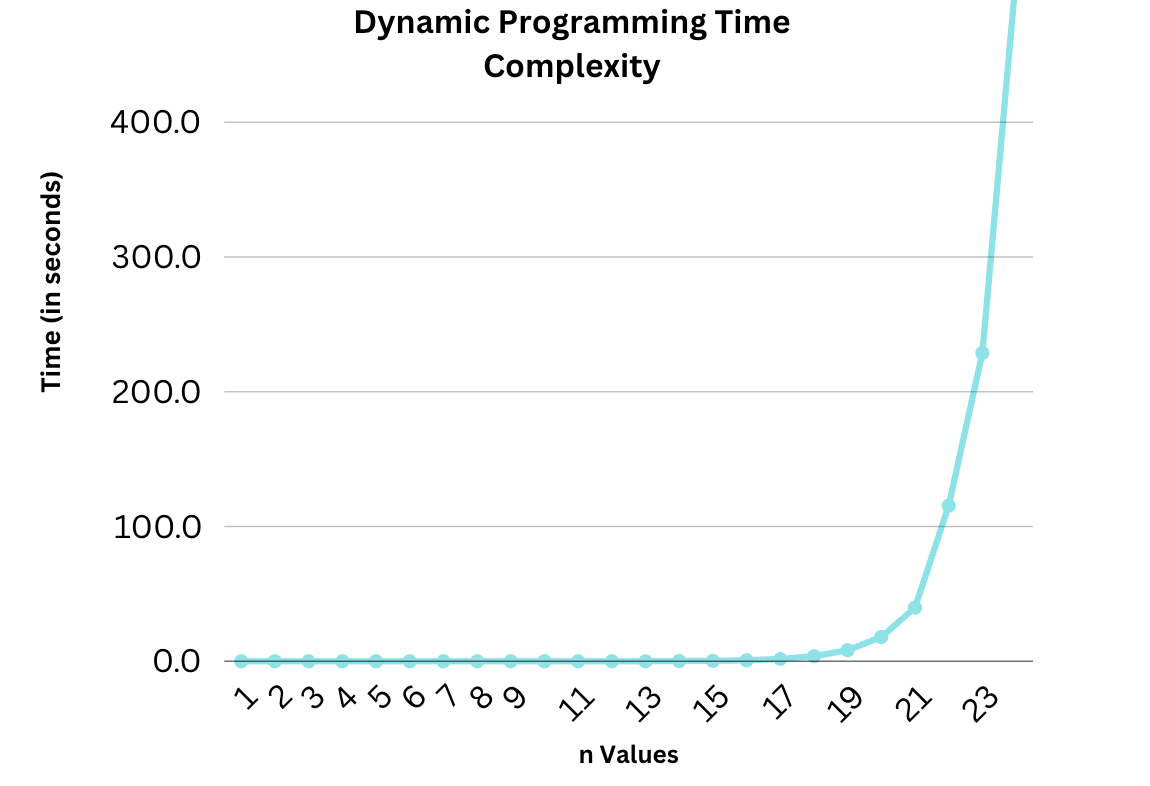

## Complexity Analysis

The algorithm begins by calculating the distance matrix between each pair of spaceships. This involves iterating over all pairs of spaceships, which takes O(n^2) time.

Next, the dynamic programming table dp is initialized to store the minimum cost to visit subsets of spaceships and end at each spaceship. This requires O(2^n * n) space, and the initialization takes O(2^n * n) time.

For each subset of spaceships (represented by mask), the algorithm tries to extend the current route by visiting a new spaceship. This involves iterating over all subsets of spaceships and checking each possible transition between spaceships. Since there are 2^n subsets and n possible transitions for each subset, this step requires O(n^2 * 2^n) time.

Finally, the algorithm reconstructs the optimal route by tracing through the parent table, which requires O(n) time.

Combining these components, the overall time complexity is dominated by the dynamic programming step, resulting in O(n^2 * 2^n), which aligns with the Held-Karp algorithm.

The space complexity is O(2^n * n) due to the distance matrix, dynamic programming table, and parent table.

# Part III: Greedy Approach (Alternate Solution)

## Solution Description:

Using the greedy approach, we begin by initializing the alpha spaceship as the starting and ending point of the route. We maintain a list of visited spaceships and ensures that no spaceship is visited more than once during the construction of the route.

At each step, the algorithm identifies the nearest unvisited spaceship by calculating the Euclidean distance from the current spaceship to all unvisited ones. The spaceship with the shortest distance is selected as the next destination. This process minimizes the immediate cost of travel at each step, though it does not guarantee a globally optimal solution.

Once all spaceships have been visited, the algorithm adds the distance back to the alpha spaceship to complete the route. The total distance traveled is calculated as the sum of the distances between consecutive spaceships, including the return to the starting point.

The greedy approach efficiently constructs a route by making locally optimal choices at each step, resulting in a computationally inexpensive solution. While it does not guarantee the shortest possible route, it provides a practical approximation, especially for larger inputs. By the end, the algorithm outputs the constructed route and its corresponding total distance.

## Psuedocode Solution:

In [ ]:
"""
# Calculate Euclidean distance between two spaceships
function euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0])^2 + (p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)

# Greedy approach to solve the Traveling Salesman Problem (TSP)
function greedy_tsp(spaceships):
    n = length(spaceships)
    visited = create_list(n, False)  # Track if a spaceship has been visited
    route = [0]  # Start from the alpha spaceship (node 0)
    visited[0] = True  # Mark the starting spaceship as visited
    total_cost = 0  # Total cost of the tour
    
    current_pos = 0  # Start at the first spaceship

    # Iterate to visit all spaceships
    for _ from 1 to n-1:
        nearest_dist = infinity
        nearest_ship = -1

        # Find the nearest unvisited spaceship
        for i from 0 to n-1:
            if not visited[i]:
                dist = euclidean_distance(spaceships[current_pos], spaceships[i])
                if dist < nearest_dist:
                    nearest_dist = dist
                    nearest_ship = i

        # Move to the nearest spaceship
        visited[nearest_ship] = True
        append(route, nearest_ship)
        total_cost += nearest_dist
        current_pos = nearest_ship  # Update current position

    # Add the cost of returning to the starting spaceship
    total_cost += euclidean_distance(spaceships[current_pos], spaceships[0])
    append(route, 0)  # Return to the start

    # Convert the best route to coordinates
    best_route_coordinates = map(route, index -> spaceships[index])

    return best_route_coordinates, total_cost
"""

## Python Implementation:

In [ ]:
import math

# Function to calculate Euclidean distance between two spaceships
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2)

# Greedy approach to solve the Traveling Salesman Problem (TSP)
def greedy_tsp(spaceships):
    n = len(spaceships)
    visited = [False] * n  # Track if a spaceship has been visited
    route = [0]  # Start from the alpha spaceship (node 0)
    visited[0] = True  # Mark the starting spaceship as visited
    total_cost = 0  # Total cost of the tour

    current_pos = 0  # Start at the first spaceship

    for _ in range(1, n):
        nearest_dist = float('inf')
        nearest_ship = -1

        # Find the nearest unvisited spaceship
        for i in range(n):
            if not visited[i]:
                dist = euclidean_distance(spaceships[current_pos], spaceships[i])
                if dist < nearest_dist:
                    nearest_dist = dist
                    nearest_ship = i

        # Move to the nearest spaceship
        visited[nearest_ship] = True
        route.append(nearest_ship)
        total_cost += nearest_dist
        current_pos = nearest_ship  # Update current position

    # Add the cost of returning to the starting spaceship
    total_cost += euclidean_distance(spaceships[current_pos], spaceships[0])
    route.append(0)  # Return to the start

    # Convert the best route to coordinates
    best_route_coordinates = [spaceships[i] for i in route]

    return best_route_coordinates, total_cost


### Performance Testing:

In [ ]:
import random
# Number of spaceships including the alpha spaceship
n = 101 
# n = 45000 is the max the program can run < 5 min

spaceship_coordinates = [
(10, 10, 10),
(-168, -64, -141),
(-200, 90, -81),
(13, -118, 131),
(109, -279, -133),
(-143, -142, 15),
(202, 231, -140),
(22, -24, -30),
(-60, -219, -48),
(-95, -289, -280),
(100, 150, -120),
(-250, 200, 80),
(-190, -80, 210),
(85, -180, -50),
(260, 60, -100),
(-230, -70, 170),
(180, -150, 90),
(-110, 240, -130),
(50, -220, 200),
(140, 130, -200),
(-280, 160, 110),
(70, -190, -210),
(210, 20, 50),
(-300, -90, 190),
(160, 100, -70),
(-20, 250, -160),
(190, -140, -30),
(-60, -230, 220),
(130, 180, -190),
(-170, 80, 140),
(240, -110, 60),
(-130, -200, -90),
(80, 220, -150),
(-210, 50, -120),
(110, -160, 170),
(-80, -240, 100),
(230, 70, -180),
(-150, 210, 40),
(90, -130, -220),
(-260, -100, 130),
(200, 30, -60),
(-100, 170, -140),
(60, -210, 190),
(170, 120, -110),
(-220, 90, 80),
(30, -180, -240),
(160, 200, -50),
(-90, -150, 230),
(210, -70, -130),
(-140, 110, 60),
(100, -190, 150),
(-70, -220, -80),
(250, 40, -170),
(-200, 140, 90),
(120, -160, -20),
(-40, 230, -190),
(180, 80, -100),
(-160, -130, 210),
(50, 190, -70),
(-250, 60, 120),
(140, -200, 40),
(-110, -240, -150),
(220, 100, -90),
(-80, 170, 200),
(190, -140, -60),
(-60, -210, 160),
(160, 50, -220),
(-190, 120, 70),
(80, -180, 130),
(-230, -100, -110),
(110, 160, -200),
(-50, 210, -80),
(200, -70, 90),
(-120, -190, 140),
(70, 130, -170),
(-170, 220, 30),
(150, -160, -40),
(-90, -230, 180),
(240, 90, -120),
(-60, 180, -150),
(180, -110, 70),
(-140, -200, -90),
(90, 150, -210),
(-220, 60, 100),
(130, -190, 50),
(-100, -170, -80),
(210, 80, -130),
(-70, 240, -60),
(160, -140, 200),
(-190, 100, -100),
(100, -210, 120),
(-50, -190, 160),
(190, 120, -90),
(-130, 150, 70),
(80, -220, -140),
(-240, -80, 110),
(140, 200, -50),
(-110, 170, -180),
(220, -130, 60),
(-80, -210, 140),
(170, 90, -160),
(-150, 230, 80)
]

# Set the coordinate range, spaceship coordinates to make them roughly in the solar system
coord_range = (-300, 300)

# Generate more unique spaceship coordinates
alpha_ship = spaceship_coordinates[0]
coordinates_set = set()
coordinates_set.add(alpha_ship) # Ensure alpha ship coordinate is included in the set to prevent duplicates

while len(spaceship_coordinates) < n:
    x = random.randint(coord_range[0], coord_range[1])
    y = random.randint(coord_range[0], coord_range[1])
    z = random.randint(coord_range[0], coord_range[1])
    coord = (x, y, z)
    if coord not in coordinates_set:
        coordinates_set.add(coord)
        spaceship_coordinates.append(coord)
# Now spaceship_coordinates contains n number of unique spaceship coordinates

# Find the shortest route
best_route, min_distance = greedy_tsp(spaceship_coordinates)

# Output the result
print(f"The best route is: {best_route}")
print(f"The total distance of the shortest route is: {min_distance}")

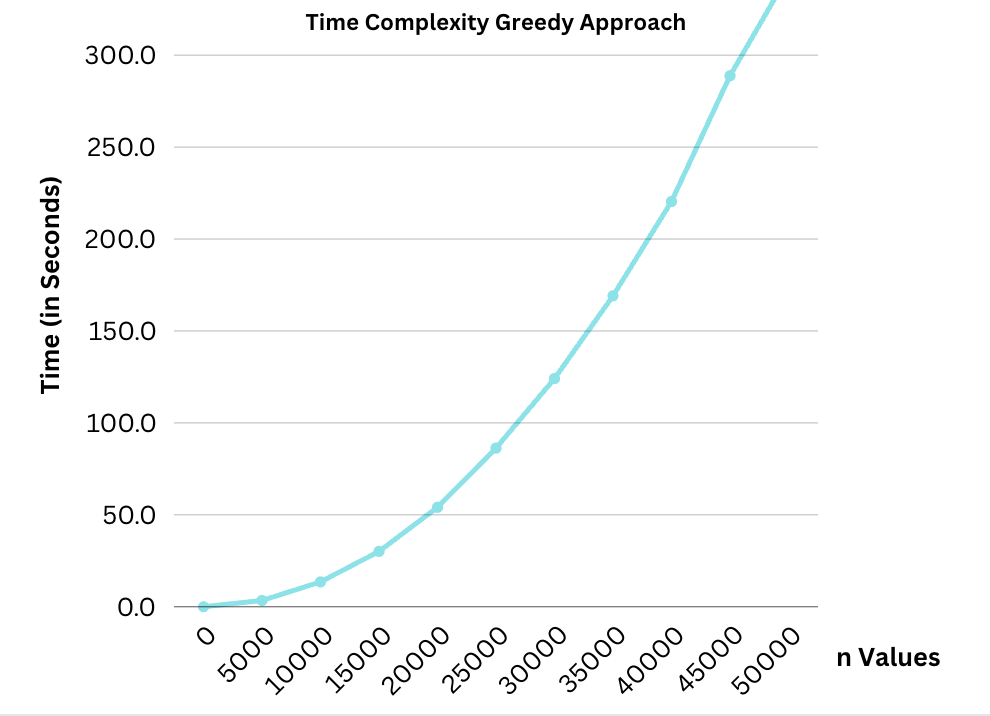

## Complexity Analysis:

The algorithm begins by calculating the distance to the nearest unvisited spaceship at each step. This involves iterating over all unvisited spaceships, which takes O(n) time for each step.

Next, the algorithm constructs the route by visiting all spaceships once. Since there are n spaceships, and the distance calculation for each step requires O(n) time, this step requires O(n^2) time in total.

Finally, the algorithm calculates the total distance of the constructed route, including the return to the alpha spaceship. This involves summing n distances, which requires O(n) time.

Combining these components, the overall time complexity is dominated by the route construction step, resulting in O(n^2).

The space complexity is O(n) because the algorithm only requires storage for the visited list, the route, and intermediate variables for distance calculations.

# Part IV: Analysis and Comparison

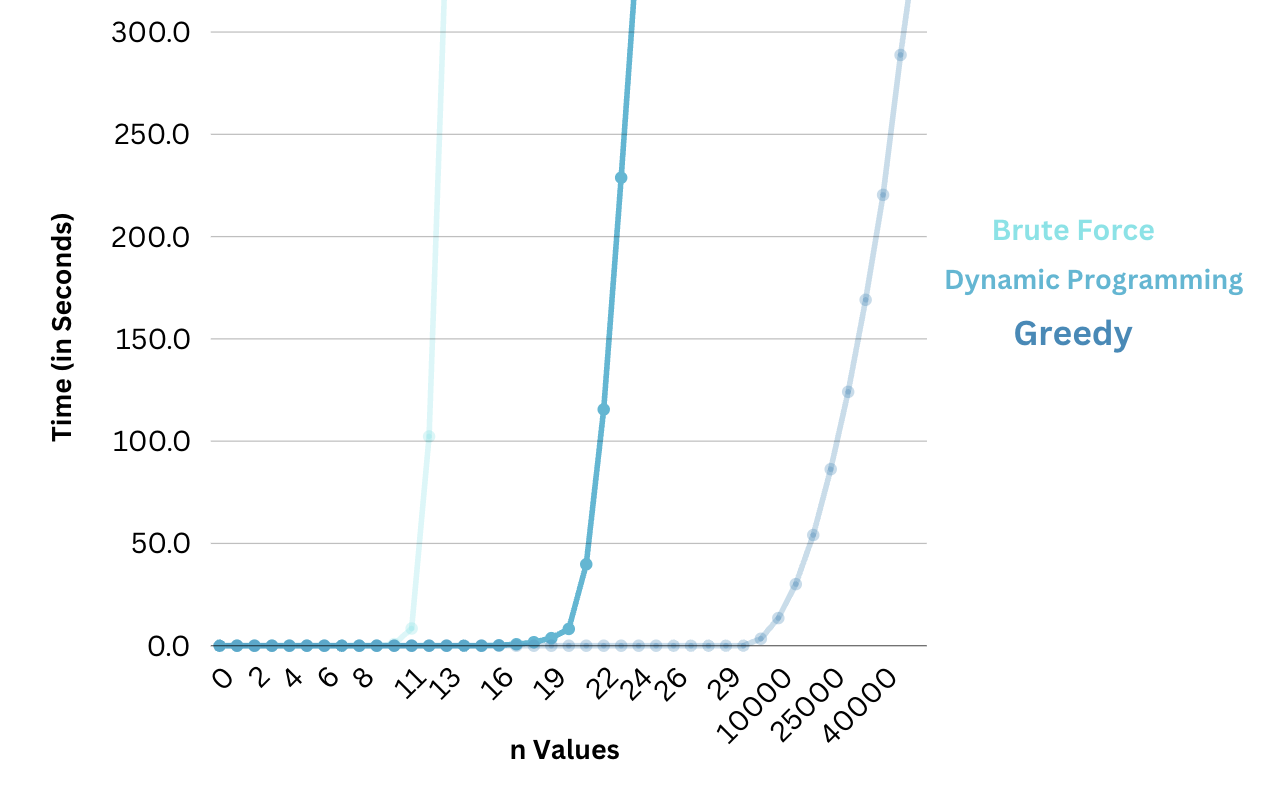

Brute Force guarantees the optimal solution but is computationally infeasible for large n due to its factorial time complexity O(n * (n-1)!), though it has minimal space requirements O(n). Dynamic Programming also guarantees an optimal solution with improved time complexity O(n^2 * 2^n) compared to brute force, but its exponential space complexity O(2^n * n) limits scalability. The Greedy algorithm is the fastest O(n^2) and has the same space complexity as Brute Force, O(n), but doesn't provide an optimal solution. For small problems, brute force works well, while dynamic programming is better suited for medium-sized inputs where both time and space constraints are manageable. Greedy is ideal for large-scale problems where runtime and memory constraints are critical, and near-optimal solutions suffice.